# Lecture 5

## A model of CEO wages

First let's load up our data, and see what we have to work with.

In [1]:
thePath = getwd()
data = as.matrix(read.csv(paste0(thePath,"/data_Gabaix_Landier.csv"), header = TRUE))
head(data)

yeara,mktcap,nFIRM,comp,nCEO
2000,17522.96,333,22024.619,74
1991,19737.49,129,NA,NA
1992,23442.23,107,NA,NA
1993,23647.43,118,NA,NA
1994,22099.51,126,5147.516,175
1995,22952.51,154,6280.350,208


We will focus on data from year 2003.

In [2]:
year = 2003
data2003 = data[data[,1]==year,,drop=FALSE]

The size of the firm is expressed as 
\begin{align*}
S(n) = A n^{-\alpha} \iff log(S(n)) = log(A) - \alpha log(n)
\end{align*}
And the wage is obtained by:
\begin{align*}
w\left(  n\right)  = \frac{A^{\gamma}BC}{\alpha\gamma-\beta}
n  ^{-\alpha\gamma+\beta}
\end{align*}
We shall use Gabaix-Landier's calibrated values
\begin{align*}
\beta\simeq2/3,\gamma\simeq1,BC=2.8\ast10^{-6}
\end{align*}
So in order compute the wage function, it remains to find the value of $A$. This will simply be a regression of $\log(S)$ on $n$.

We will normalize compensation to insure compensation and mktcap are in the same order of magnitude. We need to get rid of the `NA`'s in the data (separately for compensation and market cap) and sort in decreasing order.

In [3]:
comp = data2003[,4] / 1000 # insures same order of magnitude
comp = comp[which(!is.na(comp))]
comp = comp[order(comp, decreasing = T)]

mktcap = data2003[,2]
mktcap = mktcap[which(!is.na(mktcap))]
mktcap = mktcap[order(mktcap, decreasing = T)]

In [4]:
N = length(mktcap)
n = 1:N

Regress firm rank against mktcap

In [5]:
ols = lm(log(mktcap) ~ log(n))
summary(ols)


Call:
lm(formula = log(mktcap) ~ log(n))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.41075 -0.05161  0.03054  0.06535  0.14352 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 15.514000   0.027602   562.1   <2e-16 ***
log(n)      -0.982167   0.005195  -189.0   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1133 on 498 degrees of freedom
Multiple R-squared:  0.9863,	Adjusted R-squared:  0.9862 
F-statistic: 3.574e+04 on 1 and 498 DF,  p-value: < 2.2e-16


In [6]:
A = unname(exp(ols$coefficients[1]))

Wage function 
\begin{align*}
w\left(  n\right)  = \frac{A^{\gamma}BC}{\alpha\gamma-\beta}
n  ^{-\alpha\gamma+\beta}
\end{align*}

In [7]:
wage = function(x){
  return ((A^gamma * B * C)/ (alpha * gamma - beta) * x^(-alpha*gamma + beta))
}

We can compute the theoretical wage function and plot it against the realized wage function.


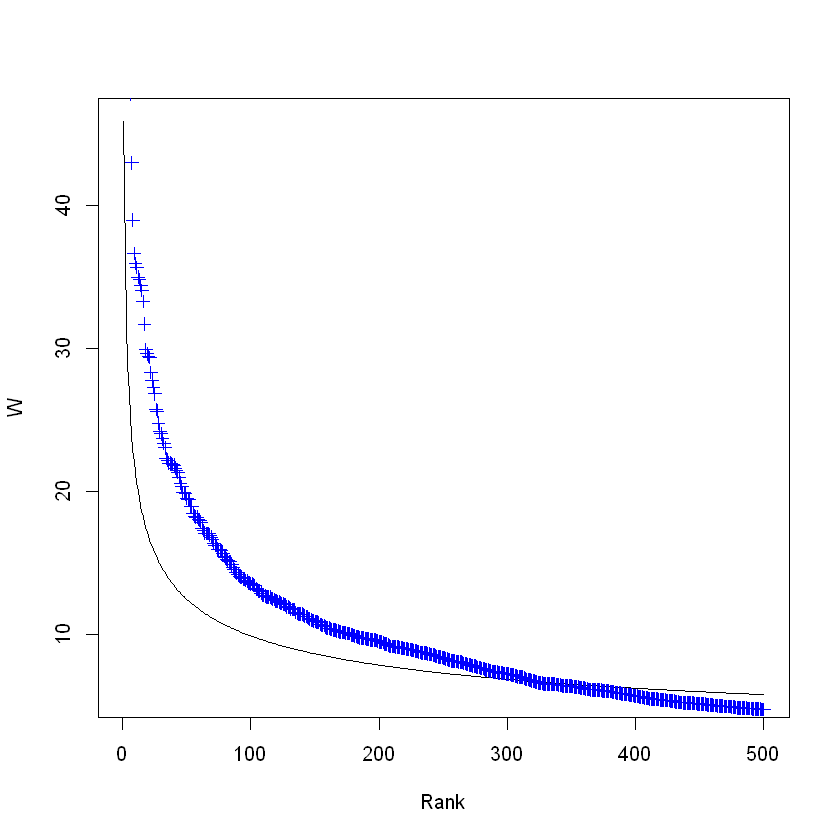

In [8]:
# Calibration 

beta = 2/3
B = 1
C = 2.8E-6
alpha = gamma = 1
X_max = 0

# Wage estimation 

W = mapply(wage, 1:N)

plot(W, type = "l", xlab = "Rank")
points(1:N, comp, pch = 3, col = "blue")